Perform additional statistical analyses to have a stronger grasp on the dataset, including autocorrelation, time-series decomposition and stationarity tests.

## Autocorrelation 

$$s_{k}=\frac{1}{n} \sum_{i=1}^{n-k}\left(y_{i}-\bar{y}\right)\left(y_{i+k}-\bar{y}\right)=\frac{1}{n} \sum_{i=k+1}^{n}\left(y_{i}-\bar{y}\right)\left(y_{i-k}-\bar{y}\right)$$  

$$r_k = \frac{s_k}{s_0}$$

In [1]:
import pandas as pd
from matplotlib import pyplot
from script.morestats import log_return

In [2]:
data_folder = "./data/"
crypto_df = pd.read_csv(data_folder + 'train.csv')

Take 5-minute BTC("Asset_ID"=1) log return for example.

5 min


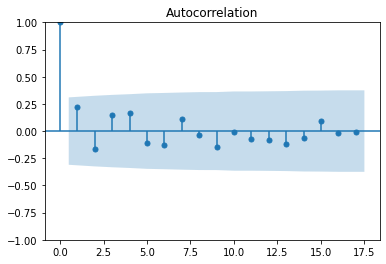

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from script.morestats import ts_with_frequency

ticker_id = 1
ticker = crypto_df[crypto_df["Asset_ID"]==ticker_id].set_index("timestamp") # Asset_ID = 1 for Bitcoin
ticker_mini = ticker.iloc[-200:] # Select recent 200 data rows
lret_ticker = log_return(ts_with_frequency(ticker_mini.Close, frequency='5min'))[1:]
plot_acf(lret_ticker)
pyplot.show()

In [7]:
from statsmodels.tsa.stattools import acf
acf(lret_ticker)

array([ 1.        ,  0.22300345, -0.16572461,  0.14992676,  0.16943098,
       -0.11037484, -0.12401055,  0.1126429 , -0.03998863, -0.14678928,
       -0.004823  , -0.07683669, -0.08140624, -0.12183986, -0.06091687,
        0.09130992, -0.0154014 ])

## Partial Autocorrelation
$$\frac{\operatorname{cov}\left(y_{i}, y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}{\sqrt{\operatorname{var}\left(y_{i} \mid y_{i-1}, \ldots, y_{i-h+1}\right) \cdot \operatorname{var}\left(y_{i-h} \mid y_{i-1}, \ldots, y_{i-h+1}\right)}}$$

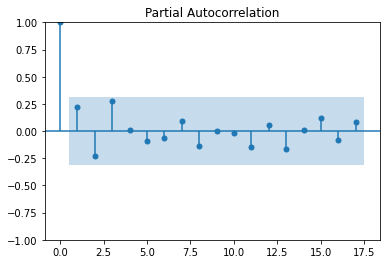

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lret_ticker,method='ywm')
pyplot.show()

In [10]:
from statsmodels.tsa.stattools import pacf
pacf(lret_ticker)

array([ 1.        ,  0.22872149, -0.23927795,  0.29801839,  0.00751242,
       -0.11132402, -0.06900502,  0.11875178, -0.1780027 ,  0.00820432,
       -0.02724231, -0.21268755,  0.08472628, -0.26502616,  0.01981886,
        0.22023236, -0.19462007])

## Decomposition
- Time Series decomposition
- Wald Theorem